In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
%store -r dataset_final_encoded

In [3]:
dataset = dataset_final_encoded.copy()
dataset

,age,month,day_of_week,duration,campaign,previous,emp.var.rate,cons.conf.idx,marital_divorced,marital_married,...,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,previously_contacted_no,previously_contacted_yes,y
0,56.000000,5,1,261,1.0,0,1.1,-36.4,0,1,...,0,1,0,1,0,0,1,1,0,0
2,37.000000,5,1,226,1.0,0,1.1,-36.4,0,1,...,0,0,1,1,0,0,1,1,0,0
3,40.000000,5,1,151,1.0,0,1.1,-36.4,0,1,...,0,1,0,1,0,0,1,1,0,0
4,56.000000,5,1,307,1.0,0,1.1,-36.4,0,1,...,0,1,0,0,1,0,1,1,0,0
6,59.000000,5,1,139,1.0,0,1.1,-36.4,0,1,...,0,1,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,39.042021,11,5,334,1.0,0,-1.1,-50.8,0,1,...,0,0,1,1,0,1,0,1,0,1
41184,46.000000,11,5,383,1.0,0,-1.1,-50.8,0,1,...,0,1,0,1,0,1,0,1,0,0
41185,56.000000,11,5,189,2.0,0,-1.1,-50.8,0,1,...,0,0,1,1,0,1,0,1,0,0
41186,44.000000,11,5,442,1.0,0,-1.1,-50.8,0,1,...,0,1,0,1,0,1,0,1,0,1


In [4]:
# Independent variables
X = dataset.iloc[:, :-1].values
X

array([[56.        ,  5.        ,  1.        , ...,  1.        ,
         1.        ,  0.        ],
       [37.        ,  5.        ,  1.        , ...,  1.        ,
         1.        ,  0.        ],
       [40.        ,  5.        ,  1.        , ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [56.        , 11.        ,  5.        , ...,  0.        ,
         1.        ,  0.        ],
       [44.        , 11.        ,  5.        , ...,  0.        ,
         1.        ,  0.        ],
       [39.04202065, 11.        ,  5.        , ...,  0.        ,
         1.        ,  0.        ]])

In [5]:
# Dependent Variable as the output
y = dataset.iloc[:, -1]
y

0        0
2        0
3        0
4        0
6        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 30604, dtype: int64

In [6]:
# For train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

In [7]:
# Scaling the inputs
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()

X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

In [8]:
# Training the model
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(solver='lbfgs', max_iter=3000, random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=3000, random_state=0)

In [9]:
# Prediction
y_pred = classifier.predict(X_test)

In [10]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[7806,  239],
       [ 724,  413]], dtype=int64)

<AxesSubplot:>

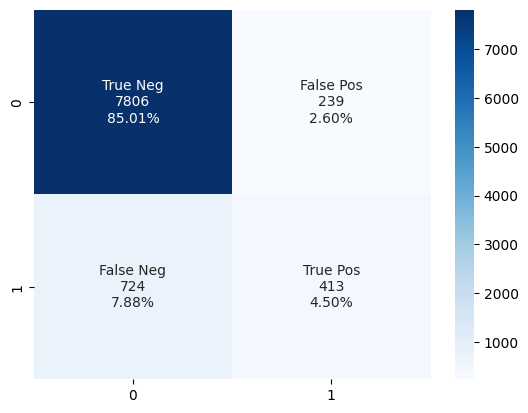

In [11]:
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in conf_matrix.flatten() / np.sum(conf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues')

In [12]:
# Measuring precision and recall
from sklearn.metrics import classification_report
target = ['No', 'Yes']
print(classification_report(y_test, y_pred, target_names = target))

              precision    recall  f1-score   support

          No       0.92      0.97      0.94      8045
         Yes       0.63      0.36      0.46      1137

    accuracy                           0.90      9182
   macro avg       0.77      0.67      0.70      9182
weighted avg       0.88      0.90      0.88      9182



In [13]:
y_pred_logistic = classifier.decision_function(X_test)

In [14]:
from sklearn.metrics import roc_curve, auc

In [15]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_logistic)
auc_logistic = auc(fpr, tpr)

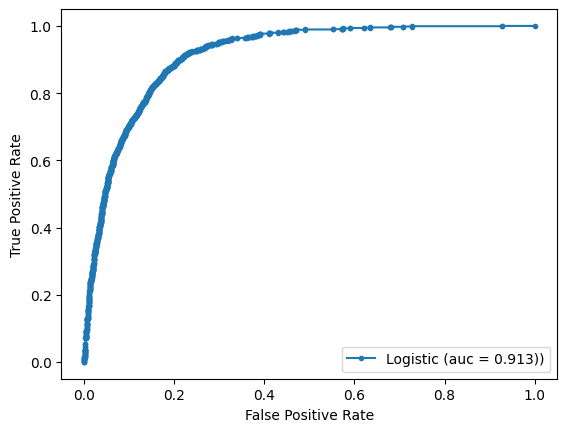

AUC value: 0.9125726932880297


In [16]:
# plt.figure(figsize=(5, 5), dpi=100)
plt.plot(fpr, tpr, marker='.', label="Logistic (auc = %0.3f))" % auc_logistic)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()
print(f"AUC value: {auc_logistic}")

## Summary
The accuracy of the model is 90% however the f1 score for "accepting term deposite" is quite low. This might be due to imbalance data. 

## Using SMOTE (Synthetic Minority Oversampling Technique)

In [17]:
from imblearn.over_sampling import SMOTEN as Resample
sm = Resample(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

c:\Users\LEGION\anaconda3\envs\ml\lib\site-packages\imblearn\over_sampling\_smote\base.py:731: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  stats.mode(X_class[nn_indices[samples_indices]], axis=1).mode, axis=1


In [18]:
y_res.value_counts()

0    18683
1    18683
Name: y, dtype: int64

In [19]:
classifier_s = LogisticRegression(solver='lbfgs', max_iter=3000, random_state = 0)
classifier_s.fit(X_res, y_res)

LogisticRegression(max_iter=3000, random_state=0)

In [20]:
# Prediction
y_pred_s = classifier_s.predict(X_test)

In [21]:
conf_matrix_s = confusion_matrix(y_test, y_pred_s)
conf_matrix_s

array([[7590,  455],
       [ 558,  579]], dtype=int64)

<AxesSubplot:>

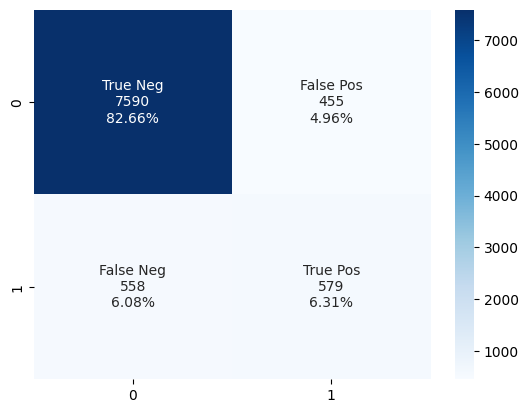

In [22]:
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in conf_matrix_s.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in conf_matrix_s.flatten() / np.sum(conf_matrix_s)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix_s, annot=labels, fmt='', cmap='Blues')

In [23]:
target = ['No', 'Yes']
print(classification_report(y_test, y_pred_s, target_names = target))

              precision    recall  f1-score   support

          No       0.93      0.94      0.94      8045
         Yes       0.56      0.51      0.53      1137

    accuracy                           0.89      9182
   macro avg       0.75      0.73      0.74      9182
weighted avg       0.89      0.89      0.89      9182



In [24]:
y_pred_logistic_s = classifier.decision_function(X_test)

In [25]:
fpr_s, tpr_s, threshold_s = roc_curve(y_test, y_pred_logistic_s)
auc_logistic_s = auc(fpr_s, tpr_s)

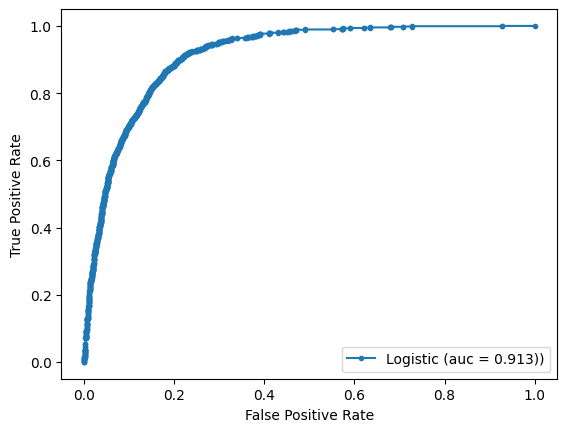

AUC value: 0.9125726932880297


In [26]:
# plt.figure(figsize=(5, 5), dpi=100)
plt.plot(fpr, tpr, marker='.', label="Logistic (auc = %0.3f))" % auc_logistic_s)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()
print(f"AUC value: {auc_logistic_s}")

### Comparing AOC value between imbalance and balanced data

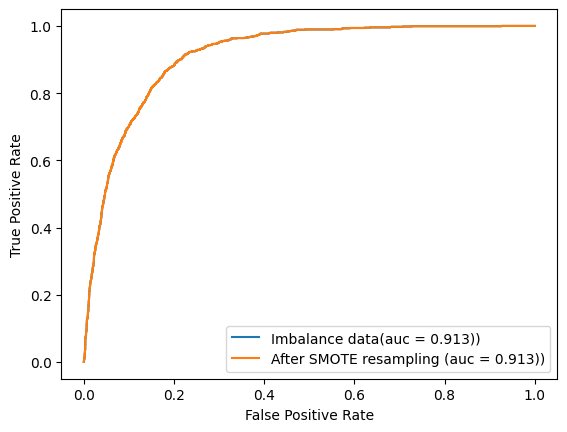

In [27]:
plt.plot(fpr, tpr, label="Imbalance data(auc = %0.3f))" % auc_logistic)
plt.plot(fpr_s, tpr_s, label="After SMOTE resampling (auc = %0.3f))" % auc_logistic_s)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()